# Определение тональности комментариев

In [1]:
# Загрузка библиотек
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import numpy as np

In [2]:
# Загрузка модели
classifier = pipeline(
    'sentiment-analysis',
    model='blanchefort/rubert-base-cased-sentiment',
    tokenizer='blanchefort/rubert-base-cased-sentiment'
)

Device set to use cpu


In [3]:
# Загрузка файла
file_path = r'C:\Users\Sviridov\Desktop\Рабочая папка\Тональность\BlogeryChaty_oct.xlsx'
df = pd.read_excel(file_path, header=9, usecols='B:AD', engine='openpyxl')
df_filtered = df[['Текст', 'Тип источника']].copy()

In [4]:
# Преобразуем все комментарии в строковый формат и размещаем в список
texts = df_filtered['Текст'].astype(str).tolist()

In [5]:
# Пропускаем сформированный список комментариев через модель с определением времени обработки.
start_time = time.time()
results = classifier(texts)
end_time = time.time()
execution_time = end_time - start_time
print(execution_time)

350.8347632884979


In [6]:
# Добавляем результаты в таблицу
df_filtered['Tone'] = [result['label'] for result in results]

In [28]:
# Создаем группировку для первого графика
grouped_df = df_filtered.groupby('Tone')['Текст'].count().reset_index()
grouped_df['ratio%'] = (grouped_df['Текст'] / grouped_df['Текст'].sum() * 100).round(1)
print(grouped_df)

       Tone  Текст  ratio%
0  NEGATIVE    321    34.8
1   NEUTRAL    426    46.2
2  POSITIVE    176    19.1


In [15]:
# Создаем сводную таблицу для второго графика
pivot_df = df_filtered.pivot_table(index='Тип источника', columns='Tone', values='Текст', aggfunc='count')
pivot_df

Tone,NEGATIVE,NEUTRAL,POSITIVE
Тип источника,,,
Мессенджеры каналы,21,21,7
Мессенджеры чаты,272,379,159
Соцсети,28,26,10


СТАТИСТИКА ТОНАЛЬНОСТИ:
  NEGATIVE: 321 записей (34.8%)
  NEUTRAL: 426 записей (46.2%)
  POSITIVE: 176 записей (19.1%)


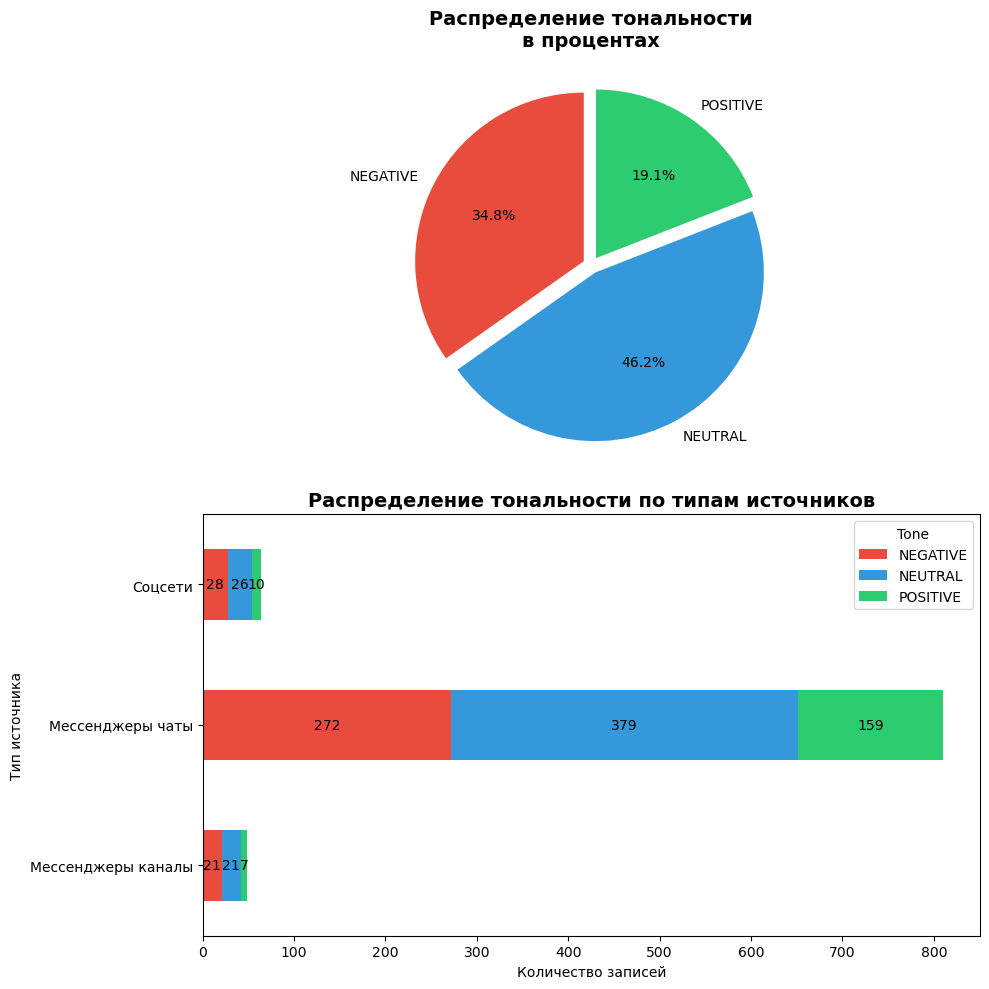

In [26]:
# Визуализация данных
print('СТАТИСТИКА ТОНАЛЬНОСТИ:')
for index, row in grouped_df.iterrows():
    tone = row['Tone']
    count = row['Текст']
    percentage = row['ratio%']
    print(f'  {tone}: {count} записей ({percentage}%)')

plt.style.use('default')
sns.set_palette('husl')

# Прописываем расположение графиков. 2 строки, 1 столбец
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Круговая диаграмма (верхний график)
colors = ['#e74c3c', '#3498db', '#2ecc71']
axes[0].pie(
    grouped_df['Текст'], 
    labels=grouped_df['Tone'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    explode=[0.05, 0.05, 0.05]
)
axes[0].set_title('Распределение тональности\nв процентах', fontsize=14, fontweight='bold')

# Столбчатая диаграмма (нижний график)
pivot_df.plot(
    kind='barh',
    stacked=True,
    color=['#e74c3c', '#3498db', '#2ecc71'],
    ax=axes[1]
)
axes[1].set_title('Распределение тональности по типам источников', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Количество записей')
axes[1].set_ylabel('Тип источника')
axes[1].legend(title='Tone')

# Добавляем кол-во комментариев на график
for bars in axes[1].containers:
    axes[1].bar_label(bars, label_type='center', fontsize=10, fmt='%d')

plt.tight_layout()
plt.show()

In [24]:
# Выгружаем таблицу, отфильтрованную по 'NEGATIVE'.
df_filtered[df_filtered['Tone'] == 'NEGATIVE'].to_excel('negative_data.xlsx', index=False)